# Name: Sayali Suresh Ranjane
# Gmail: Sayaliranjane28@gmail.com
# LinkedIn: https://www.linkedin.com/in/sayali-ranjane-595606187/
# GitHub: https://github.com/Sayaliranjane/Analysis
# Task-1 Prediction Using supervised ML


## Import Libraries and Packages

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

## Import Dataset

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
scores_data = pd.read_csv(url)
print("Data imported successfully")

scores_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Check rows and columns

In [3]:
scores_data.shape

(25, 2)

In [4]:
scores_data.info()
#there is no null values so we can say that data are cleaned and ready for modelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
scores_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


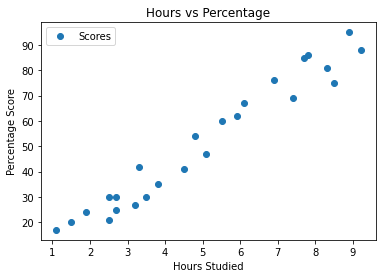

In [6]:

#Before modeling check if there is linearity in independent variable and dependent variable
scores_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

By seeing this plot, we can clearly say that there is positive linear relationship between number of hours studied and percentage scored.

<AxesSubplot:>

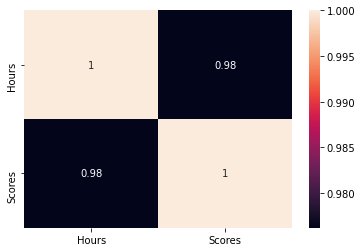

In [7]:
sns.heatmap(scores_data.corr(),annot=True)

# Model Building

In [8]:
#divide the data into attributes(inputs) as X and target variable(response) as y
X = scores_data.iloc[:, :-1].values  
y = scores_data.iloc[:, 1].values  

In [9]:
#split the data into train and test 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=100) 

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [11]:
y_pred_train=model.predict(X_train)
y_pred_train

array([74.77171154, 69.85398935, 49.19955615, 92.47551143, 46.24892283,
       36.41347845, 78.7058893 , 26.57803407, 52.15018946, 28.54512294,
       12.80841193, 20.67676744, 61.98563385, 33.46284514, 77.72234486,
       26.57803407, 89.52487812, 56.08436722, 85.59070036, 83.62361149])

In [12]:
y_pred_test=model.predict(X_test)
y_pred_test

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df 

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


In [14]:
# You can also test with your own data
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.96728365185982


# Model Evaluation

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test)) 

Mean Absolute Error: 4.140342096254413
